Importamos lo mismo que en la otra parte del código

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#mdates to customize x-axis to only show times where we have data!
import matplotlib.dates as mdates

from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


import plotly.graph_objects as go
import plotly.io as pio  # Import plotly.io


#To save data and edit in excel
from openpyxl import Workbook
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

#To visualize the correct date in the title of the graphics
import re
import xlsxwriter

import os


In [29]:
##Actualizacion de plotly
!pip3 install plotly --upgrade

  Using cached plotly-5.18.0-py3-none-any.whl (15.6 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0


En este archivo vamos a generar visualizaciones del INCA para cada mes.
Para empezar, visualizamos en gráficas lineales como fluctua el valor del INCA entre los 6 posibles, en cada mes, y en cada dispositivo:
(A tener en cuenta que en mayo y junio se han actualizado los valores, vamos a visualizar las gráficas correspondientes en primer lugar a los resultados previos de mayo y junio, y a continuación todos los de mayo a octubre actualizados tras el reajuste de los sensores:

In [ ]:
##Para Mayo PREVIO
dataframes = []

# Iterate over all the sheets corresponding to the days of May
for day in range(1, 32):
    sheet_name = f"2023-05-{day:02}"
    file_path = "PREVresultados_INCA_MAYO23.xlsx"

    # Load the data from the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    dataframes.append(df)

# Combine the dataframes into one using pd.concat
combined_data = pd.concat(dataframes, ignore_index=True)

banda_to_index = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Convert the "Datetime" column to datetime format
combined_data['Datetime'] = pd.to_datetime(combined_data['Datetime'], format='%d/%m/%Y %H:%M:%S')

# Create a separate plot for each device
devices = combined_data['Dispositivo'].dropna().unique()

for device in devices:
    plt.figure(figsize=(12, 6))
    plt.title(f"Dispositivo: {device}")
    plt.xlabel("Fecha")
    plt.ylabel("Indice INCA")
    plt.ylim(1, 6)  # Set the y-axis range

    # Filter data for the current device
    device_data = combined_data[combined_data['Dispositivo'] == device]

    # Clean the datetime data by dropping rows with missing or invalid datetime values
    device_data = device_data.dropna(subset=['Datetime'])

    if not device_data.empty:
        # Sort data by datetime
        device_data = device_data.sort_values(by='Datetime')

        # Create a continuous sequence of time points with corresponding "Banda" values
        continuous_data = pd.DataFrame({'Datetime': pd.date_range(start=device_data['Datetime'].min(), end=device_data['Datetime'].max(), freq='H')})
        continuous_data['Banda'] = pd.merge_asof(continuous_data, device_data, on='Datetime', direction='backward')['Banda']

        # Plot the continuous data
        plt.plot(continuous_data['Datetime'], [banda_to_index.get(banda, 0) for banda in continuous_data['Banda']], color='black', label='Banda')

        plt.legend()  # Add the legend when valid data is available

    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

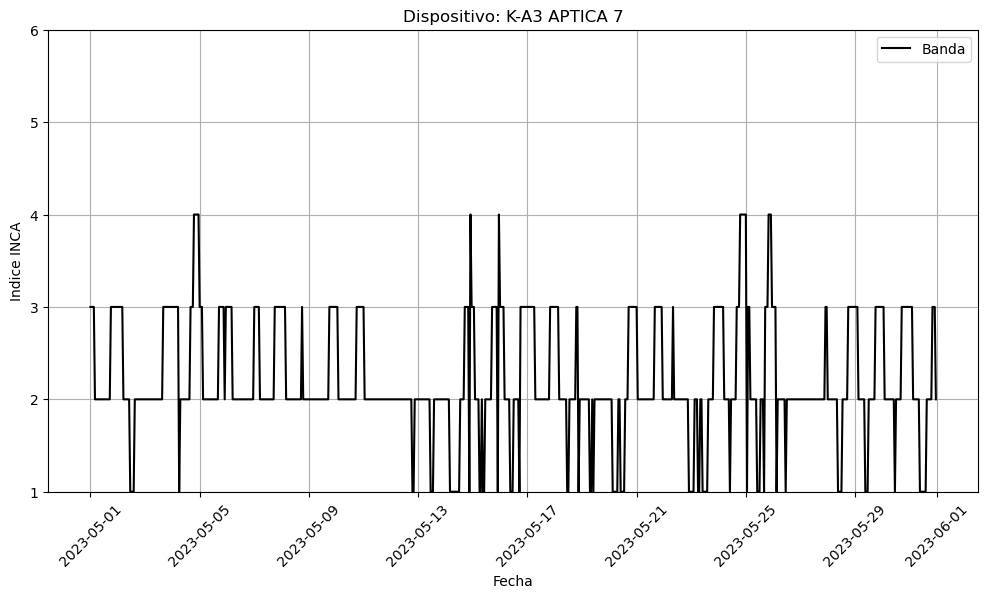

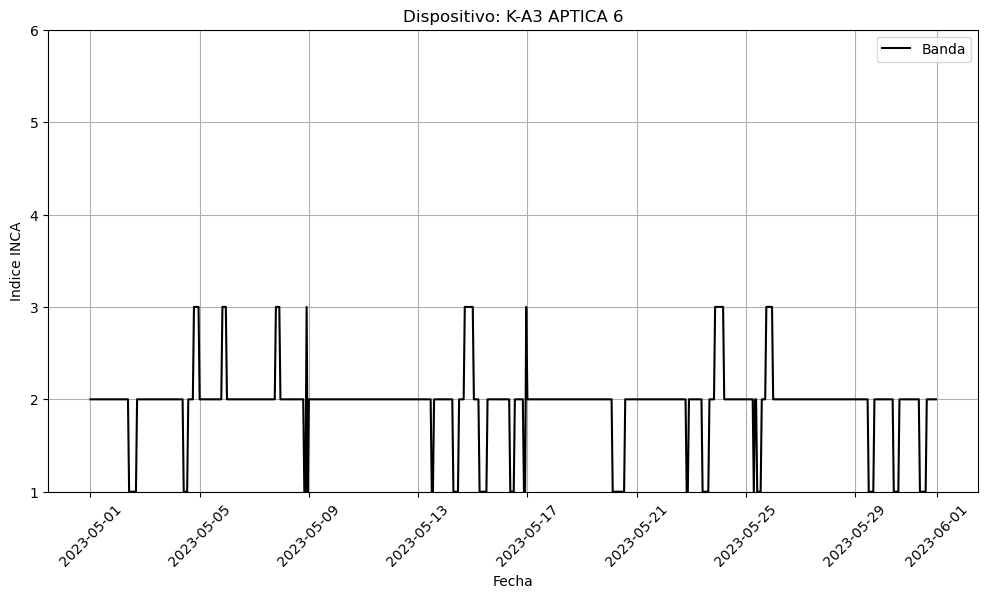

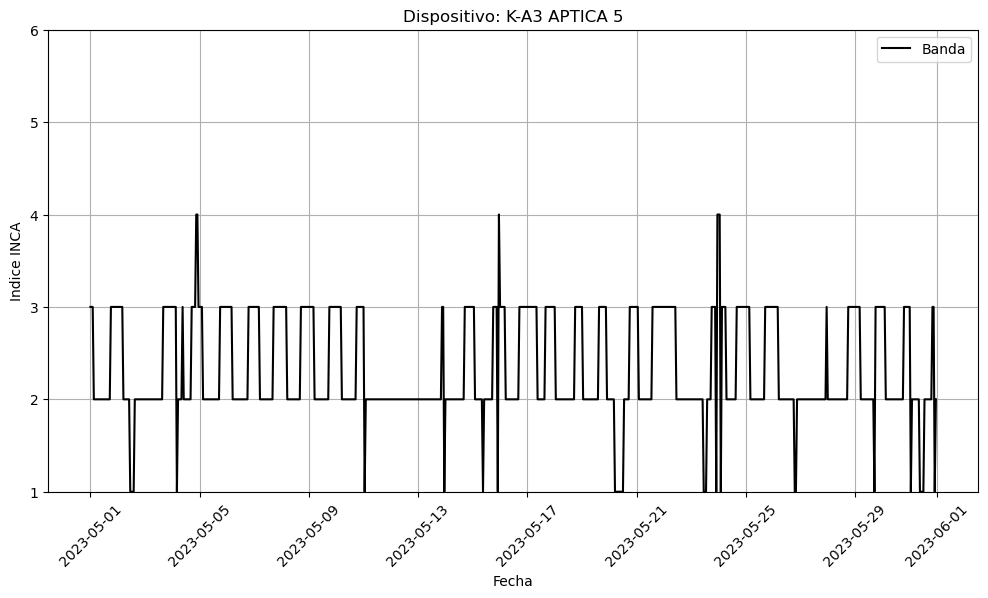

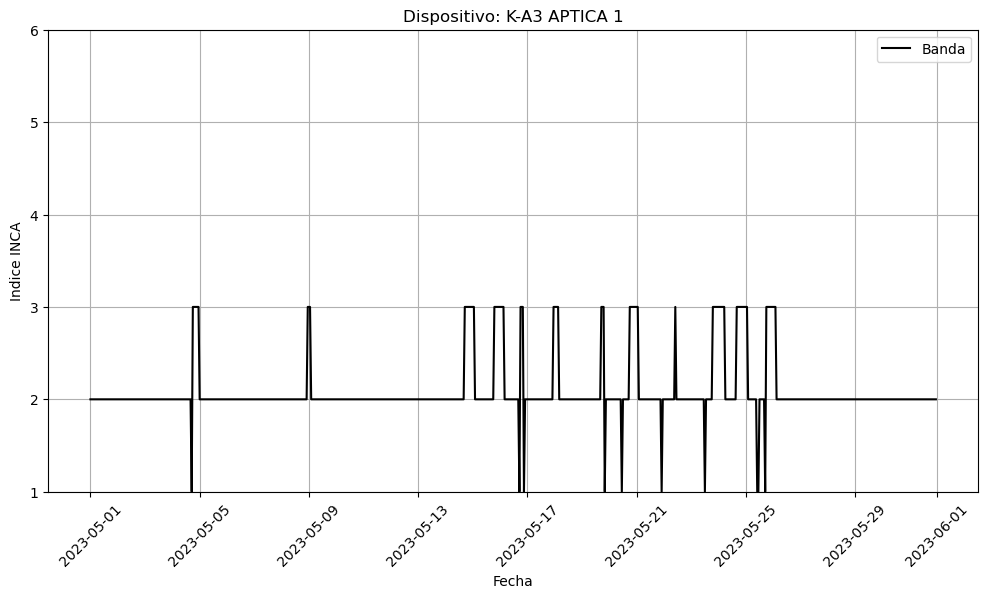

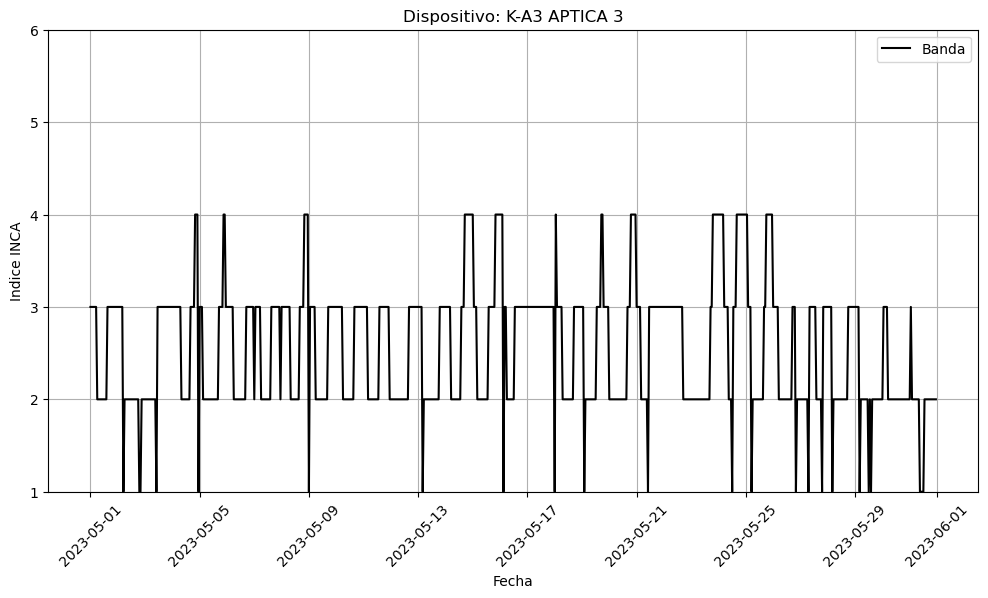

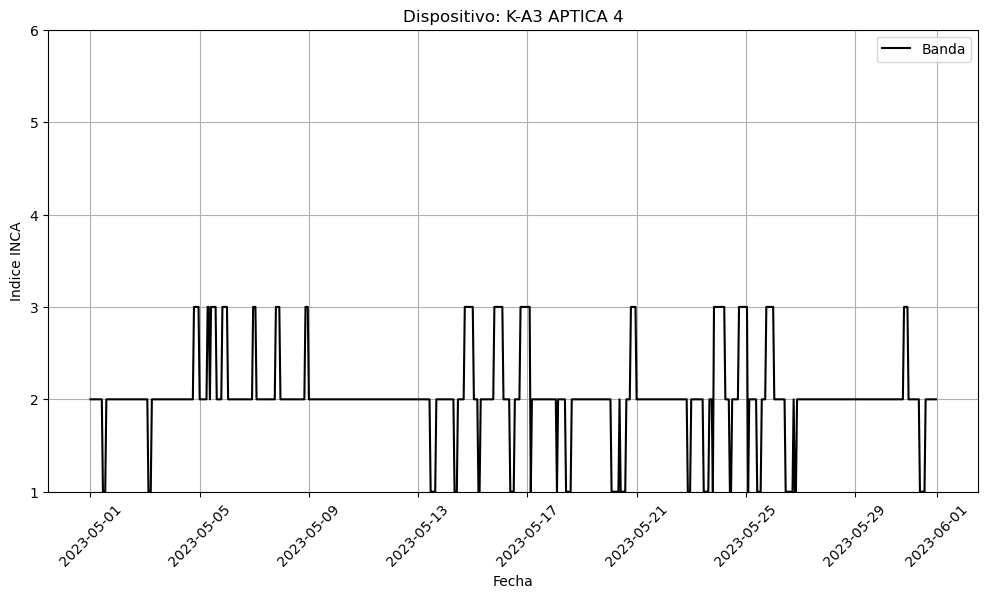

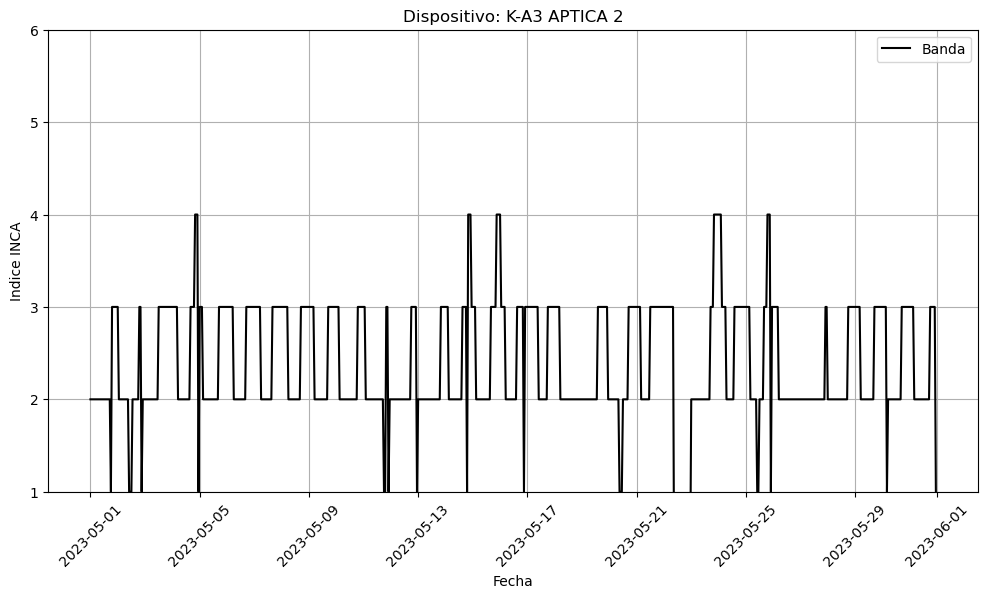

In [2]:
##Para Mayo
dataframes = []

# Iterate over all the sheets corresponding to the days of May
for day in range(1, 32):
    sheet_name = f"2023-05-{day:02}"
    file_path = "resultados_INCA_MAYO23.xlsx"

    # Load the data from the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    dataframes.append(df)

# Combine the dataframes into one using pd.concat
combined_data = pd.concat(dataframes, ignore_index=True)

banda_to_index = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Convert the "Datetime" column to datetime format
combined_data['Datetime'] = pd.to_datetime(combined_data['Datetime'], format='%d/%m/%Y %H:%M:%S')

# Create a separate plot for each device
devices = combined_data['Dispositivo'].dropna().unique()

for device in devices:
    plt.figure(figsize=(12, 6))
    plt.title(f"Dispositivo: {device}")
    plt.xlabel("Fecha")
    plt.ylabel("Indice INCA")
    plt.ylim(1, 6)  # Set the y-axis range

    # Filter data for the current device
    device_data = combined_data[combined_data['Dispositivo'] == device]

    # Clean the datetime data by dropping rows with missing or invalid datetime values
    device_data = device_data.dropna(subset=['Datetime'])

    if not device_data.empty:
        # Sort data by datetime
        device_data = device_data.sort_values(by='Datetime')

        # Create a continuous sequence of time points with corresponding "Banda" values
        continuous_data = pd.DataFrame({'Datetime': pd.date_range(start=device_data['Datetime'].min(), end=device_data['Datetime'].max(), freq='H')})
        continuous_data['Banda'] = pd.merge_asof(continuous_data, device_data, on='Datetime', direction='backward')['Banda']

        # Plot the continuous data
        plt.plot(continuous_data['Datetime'], [banda_to_index.get(banda, 0) for banda in continuous_data['Banda']], color='black', label='Banda')

        plt.legend()  # Add the legend when valid data is available

    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

In [ ]:
##Para Junio PREVIO

dataframes = []

# Iterate over all the sheets corresponding to the days of June
for day in range(1, 31):
    sheet_name = f"2023-06-{day:02}"
    file_path = "PREVresultados_INCA_JUNIO23.xlsx"

    # Load the data from the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    dataframes.append(df)

# Combine the dataframes into one using pd.concat
combined_data = pd.concat(dataframes, ignore_index=True)

banda_to_index = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Convert the "Datetime" column to datetime format
combined_data['Datetime'] = pd.to_datetime(combined_data['Datetime'], format='%d/%m/%Y %H:%M:%S')

# Create a separate plot for each device
devices = combined_data['Dispositivo'].dropna().unique()

for device in devices:
    plt.figure(figsize=(12, 6))
    plt.title(f"Dispositivo: {device}")
    plt.xlabel("Fecha")
    plt.ylabel("Indice INCA")
    plt.ylim(1, 6)  # Set the y-axis range

    # Filter data for the current device
    device_data = combined_data[combined_data['Dispositivo'] == device]

    # Clean the datetime data by dropping rows with missing or invalid datetime values
    device_data = device_data.dropna(subset=['Datetime'])

    if not device_data.empty:
        # Sort data by datetime
        device_data = device_data.sort_values(by='Datetime')

        # Create a continuous sequence of time points with corresponding "Banda" values
        continuous_data = pd.DataFrame({'Datetime': pd.date_range(start=device_data['Datetime'].min(), end=device_data['Datetime'].max(), freq='H')})
        continuous_data['Banda'] = pd.merge_asof(continuous_data, device_data, on='Datetime', direction='backward')['Banda']

        # Plot the continuous data
        plt.plot(continuous_data['Datetime'], [banda_to_index.get(banda, 0) for banda in continuous_data['Banda']], color='black', label='Banda')

        plt.legend()  # Add the legend when valid data is available

    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

In [ ]:
##Para Junio

dataframes = []

# Iterate over all the sheets corresponding to the days of June
for day in range(1, 31):
    sheet_name = f"2023-06-{day:02}"
    file_path = "resultados_INCA_JUNIO23.xlsx"

    # Load the data from the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    dataframes.append(df)

# Combine the dataframes into one using pd.concat
combined_data = pd.concat(dataframes, ignore_index=True)

banda_to_index = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Convert the "Datetime" column to datetime format
combined_data['Datetime'] = pd.to_datetime(combined_data['Datetime'], format='%d/%m/%Y %H:%M:%S')

# Create a separate plot for each device
devices = combined_data['Dispositivo'].dropna().unique()

for device in devices:
    plt.figure(figsize=(12, 6))
    plt.title(f"Dispositivo: {device}")
    plt.xlabel("Fecha")
    plt.ylabel("Indice INCA")
    plt.ylim(1, 6)  # Set the y-axis range

    # Filter data for the current device
    device_data = combined_data[combined_data['Dispositivo'] == device]

    # Clean the datetime data by dropping rows with missing or invalid datetime values
    device_data = device_data.dropna(subset=['Datetime'])

    if not device_data.empty:
        # Sort data by datetime
        device_data = device_data.sort_values(by='Datetime')

        # Create a continuous sequence of time points with corresponding "Banda" values
        continuous_data = pd.DataFrame({'Datetime': pd.date_range(start=device_data['Datetime'].min(), end=device_data['Datetime'].max(), freq='H')})
        continuous_data['Banda'] = pd.merge_asof(continuous_data, device_data, on='Datetime', direction='backward')['Banda']

        # Plot the continuous data
        plt.plot(continuous_data['Datetime'], [banda_to_index.get(banda, 0) for banda in continuous_data['Banda']], color='black', label='Banda')

        plt.legend()  # Add the legend when valid data is available

    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

In [ ]:
##Para Julio
dataframes = []

# Iterate over all the sheets corresponding to the days of May
for day in range(1, 32):
    sheet_name = f"2023-07-{day:02}"
    file_path = "resultados_INCA_JULIO23.xlsx"

    # Load the data from the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    dataframes.append(df)

# Combine the dataframes into one using pd.concat
combined_data = pd.concat(dataframes, ignore_index=True)

banda_to_index = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Convert the "Datetime" column to datetime format
combined_data['Datetime'] = pd.to_datetime(combined_data['Datetime'], format='%d/%m/%Y %H:%M:%S')

# Create a separate plot for each device
devices = combined_data['Dispositivo'].dropna().unique()

for device in devices:
    plt.figure(figsize=(12, 6))
    plt.title(f"Dispositivo: {device}")
    plt.xlabel("Fecha")
    plt.ylabel("Indice INCA")
    plt.ylim(1, 6)  # Set the y-axis range

    # Filter data for the current device
    device_data = combined_data[combined_data['Dispositivo'] == device]

    # Clean the datetime data by dropping rows with missing or invalid datetime values
    device_data = device_data.dropna(subset=['Datetime'])

    if not device_data.empty:
        # Sort data by datetime
        device_data = device_data.sort_values(by='Datetime')

        # Create a continuous sequence of time points with corresponding "Banda" values
        continuous_data = pd.DataFrame({'Datetime': pd.date_range(start=device_data['Datetime'].min(), end=device_data['Datetime'].max(), freq='H')})
        continuous_data['Banda'] = pd.merge_asof(continuous_data, device_data, on='Datetime', direction='backward')['Banda']

        # Plot the continuous data
        plt.plot(continuous_data['Datetime'], [banda_to_index.get(banda, 0) for banda in continuous_data['Banda']], color='black', label='Banda')

        plt.legend()  # Add the legend when valid data is available

    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


In [ ]:
##Para Agosto
dataframes = []

# Iterate over all the sheets corresponding to the days of May
for day in range(1, 32):
    sheet_name = f"2023-08-{day:02}"
    file_path = "resultados_INCA_AGOSTO23.xlsx"

    # Load the data from the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    dataframes.append(df)

# Combine the dataframes into one using pd.concat
combined_data = pd.concat(dataframes, ignore_index=True)

banda_to_index = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Convert the "Datetime" column to datetime format
combined_data['Datetime'] = pd.to_datetime(combined_data['Datetime'], format='%d/%m/%Y %H:%M:%S')

# Create a separate plot for each device
devices = combined_data['Dispositivo'].dropna().unique()

for device in devices:
    plt.figure(figsize=(12, 6))
    plt.title(f"Dispositivo: {device}")
    plt.xlabel("Fecha")
    plt.ylabel("Indice INCA")
    plt.ylim(1, 6)  # Set the y-axis range

    # Filter data for the current device
    device_data = combined_data[combined_data['Dispositivo'] == device]

    # Clean the datetime data by dropping rows with missing or invalid datetime values
    device_data = device_data.dropna(subset=['Datetime'])

    if not device_data.empty:
        # Sort data by datetime
        device_data = device_data.sort_values(by='Datetime')

        # Create a continuous sequence of time points with corresponding "Banda" values
        continuous_data = pd.DataFrame({'Datetime': pd.date_range(start=device_data['Datetime'].min(), end=device_data['Datetime'].max(), freq='H')})
        continuous_data['Banda'] = pd.merge_asof(continuous_data, device_data, on='Datetime', direction='backward')['Banda']

        # Plot the continuous data
        plt.plot(continuous_data['Datetime'], [banda_to_index.get(banda, 0) for banda in continuous_data['Banda']], color='black', label='Banda')

        plt.legend()  # Add the legend when valid data is available

    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


In [ ]:
##Para Septiembre
dataframes = []

# Iterate over all the sheets corresponding to the days of May
for day in range(1, 32):
    sheet_name = f"2023-09-{day:02}"
    file_path = "resultados_INCA_SEPTIEMBRE23.xlsx"

    # Load the data from the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    dataframes.append(df)

# Combine the dataframes into one using pd.concat
combined_data = pd.concat(dataframes, ignore_index=True)

banda_to_index = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Convert the "Datetime" column to datetime format
combined_data['Datetime'] = pd.to_datetime(combined_data['Datetime'], format='%d/%m/%Y %H:%M:%S')

# Create a separate plot for each device
devices = combined_data['Dispositivo'].dropna().unique()

for device in devices:
    plt.figure(figsize=(12, 6))
    plt.title(f"Dispositivo: {device}")
    plt.xlabel("Fecha")
    plt.ylabel("Indice INCA")
    plt.ylim(1, 6)  # Set the y-axis range

    # Filter data for the current device
    device_data = combined_data[combined_data['Dispositivo'] == device]

    # Clean the datetime data by dropping rows with missing or invalid datetime values
    device_data = device_data.dropna(subset=['Datetime'])

    if not device_data.empty:
        # Sort data by datetime
        device_data = device_data.sort_values(by='Datetime')

        # Create a continuous sequence of time points with corresponding "Banda" values
        continuous_data = pd.DataFrame({'Datetime': pd.date_range(start=device_data['Datetime'].min(), end=device_data['Datetime'].max(), freq='H')})
        continuous_data['Banda'] = pd.merge_asof(continuous_data, device_data, on='Datetime', direction='backward')['Banda']

        # Plot the continuous data
        plt.plot(continuous_data['Datetime'], [banda_to_index.get(banda, 0) for banda in continuous_data['Banda']], color='black', label='Banda')

        plt.legend()  # Add the legend when valid data is available

    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

In [ ]:
##Para Octubre
dataframes = []

# Iterate over all the sheets corresponding to the days of May
for day in range(1, 32):
    sheet_name = f"2023-10-{day:02}"
    file_path = "resultados_INCA_OCTUBRE23.xlsx"

    # Load the data from the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    dataframes.append(df)

# Combine the dataframes into one using pd.concat
combined_data = pd.concat(dataframes, ignore_index=True)

banda_to_index = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Convert the "Datetime" column to datetime format
combined_data['Datetime'] = pd.to_datetime(combined_data['Datetime'], format='%d/%m/%Y %H:%M:%S')

# Create a separate plot for each device
devices = combined_data['Dispositivo'].dropna().unique()

for device in devices:
    plt.figure(figsize=(12, 6))
    plt.title(f"Dispositivo: {device}")
    plt.xlabel("Fecha")
    plt.ylabel("Indice INCA")
    plt.ylim(1, 6)  # Set the y-axis range

    # Filter data for the current device
    device_data = combined_data[combined_data['Dispositivo'] == device]

    # Clean the datetime data by dropping rows with missing or invalid datetime values
    device_data = device_data.dropna(subset=['Datetime'])

    if not device_data.empty:
        # Sort data by datetime
        device_data = device_data.sort_values(by='Datetime')

        # Create a continuous sequence of time points with corresponding "Banda" values
        continuous_data = pd.DataFrame({'Datetime': pd.date_range(start=device_data['Datetime'].min(), end=device_data['Datetime'].max(), freq='H')})
        continuous_data['Banda'] = pd.merge_asof(continuous_data, device_data, on='Datetime', direction='backward')['Banda']

        # Plot the continuous data
        plt.plot(continuous_data['Datetime'], [banda_to_index.get(banda, 0) for banda in continuous_data['Banda']], color='black', label='Banda')

        plt.legend()  # Add the legend when valid data is available

    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


Generación de gráficas para la visualización de la probabilidad de que cada agente se encuentre en la banda superior en cada instante, y para cada sensor.
Orden de gráficas:
Mayo previo
Mayo
Junio previo
Junio
Julio
Agosto
Septiembre
Octubre

In [ ]:
# Read the Excel file and combine all sheets into a single DataFrame
file_path = "PREVresultados_INCA_MAYO23.xlsx"
dataframes = []
for day in range(1, 32):
    sheet_name = f"2023-05-{day:02}"
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
# Convert 'Datetime' to a datetime object and extract the hour
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d/%m/%Y %H:%M:%S')
data['Hour'] = data['Datetime'].dt.hour

# Define the order of agents for column ordering in the stacked bar chart
agent_order = [
    "O3 GCc AVG8H (ug/m3)",
    "SO2 GCc AVG1H (ug/m3)",
    "PM2.5 AVG24H (ug/m3)",
    "PM10 AVG24H (ug/m3)",
    "NO2 GCc AVG1H (ug/m3)"
]

# Define a dictionary to map the index level to a numerical value
index_level_mapping = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Pivot the data to get the count of each agent for each device and hour
pivot_data = data.pivot_table(index=['Dispositivo', 'Hour'], columns='Agente en banda superior', aggfunc='size', fill_value=0)

# Calculate the probabilities for each agent for each hour
pivot_data_percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Create a stacked bar chart for each device
devices = pivot_data_percentages.index.get_level_values(0).unique()
colors = ['forestgreen', 'orangered', 'gold', 'purple', 'royalblue']

for device in devices:
    device_data = pivot_data_percentages.xs(device, level='Dispositivo')
    hours = device_data.index
    agent_probabilities = device_data.values.T

    plt.figure(figsize=(12, 6))
    plt.title(f"Distribución de agentes en banda superior en el Dispositivo: {device}")
    plt.xlabel("Horas")
    plt.ylabel("Probabilidad")
    plt.xticks(range(len(hours)), hours)
    plt.ylim(0, 1)

    bottom = np.zeros(len(hours))
    for i, agent in enumerate(pivot_data_percentages.columns):
        plt.bar(range(len(hours)), agent_probabilities[i], label=agent, bottom=bottom, color=colors[i])
        bottom += agent_probabilities[i]

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.show()

Intento mejorar las gráficas anteriores convirtiendolas en algo un poco más interactivo, donde al pasar por encima de la gráfica te indica cual es el agente que se representa en ese color y cual es el porcentaje que le corresponde en esa hora.

La única manera que he encontrado de guardar algo que aquí es interactivo para poder verlo desde fuera de jupyter es en html, así que he creado html para cada gráfica Con el siguiente código se genera un html por gráfica, estoy intentando guardarlas todas en un mismo html y que las gráficas estén separadas entre si para que se vea bien los datos de cada gráfica.
Orden de gráficas:
Mayo previo
Mayo
Junio previo
Junio
Julio
Agosto
Septiembre
Octubre

En este código se genera un html por gráfica, CON LA ÚLTIMA LÍNEA, LA QUITO PARA SOLO VISUALIZAR AQUI Y GUARDAR EN HTML CUANDO TENGA LOS RESULTADOS QUE QUIERO

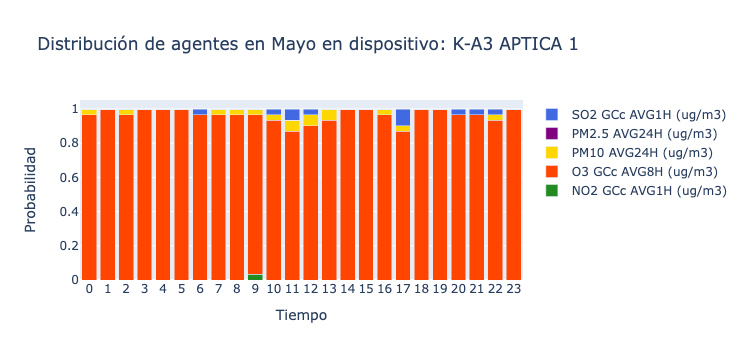

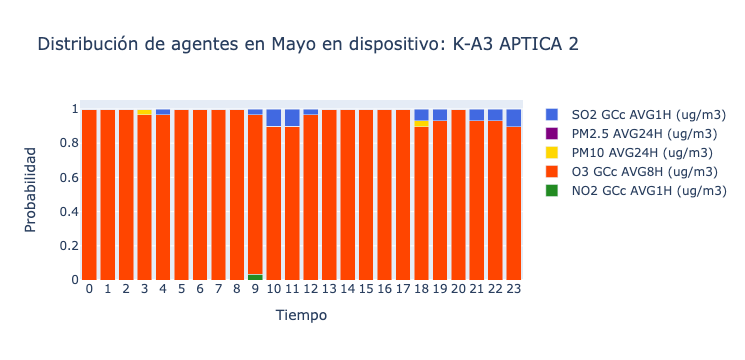

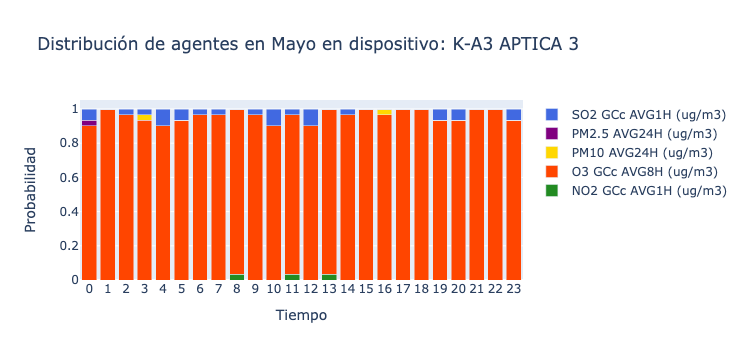

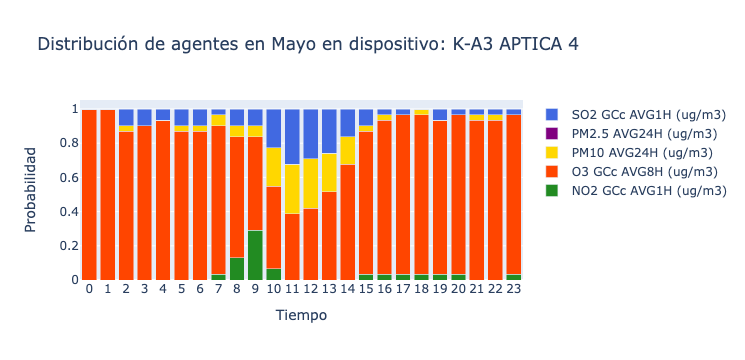

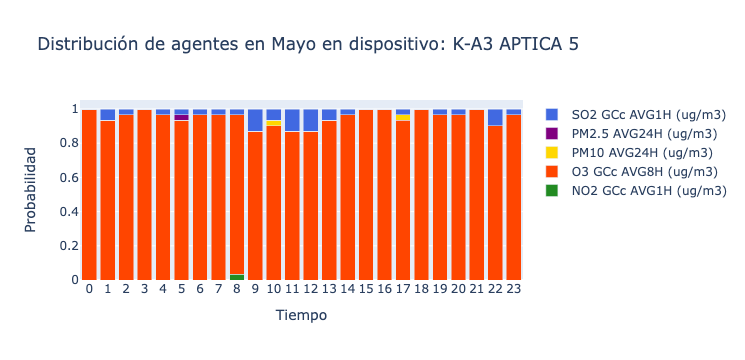

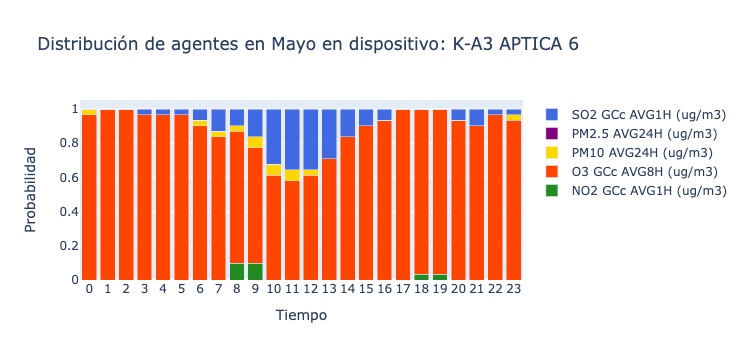

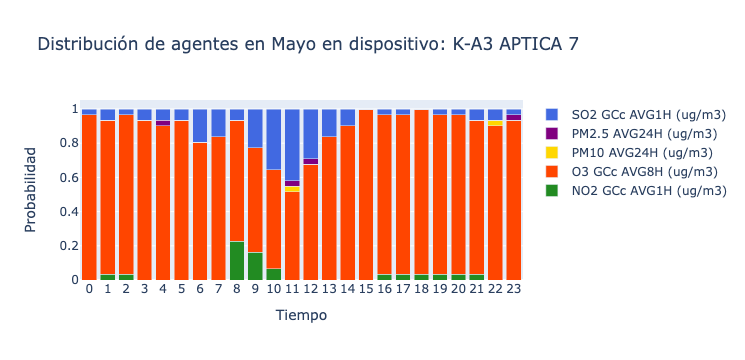

In [10]:
# Read the Excel file and combine all sheets into a single DataFrame
file_path = "PREVresultados_INCA_MAYO23.xlsx"
dataframes = []
for day in range(1, 32):
    sheet_name = f"2023-05-{day:02}"
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
# Convert 'Datetime' to a datetime object and extract the hour
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d/%m/%Y %H:%M:%S')
data['Hour'] = data['Datetime'].dt.hour

# Define the order of agents for column ordering in the stacked bar chart
agent_order = [
    "O3 GCc AVG8H (ug/m3)",
    "SO2 GCc AVG1H (ug/m3)",
    "PM2.5 AVG24H (ug/m3)",
    "PM10 AVG24H (ug/m3)",
    "NO2 GCc AVG1H (ug/m3)"
]

# Define a dictionary to map the index level to a numerical value
index_level_mapping = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Create a list of all hours from 0 to 23
all_hours = list(range(24))

# Pivot the data to get the count of each agent for each device and hour
pivot_data = data.pivot_table(index=['Dispositivo', 'Hour'], columns='Agente en banda superior', aggfunc='size', fill_value=0)
# Calculate the probabilities for each agent for each hour
pivot_data_percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Create a stacked bar chart for each device using Plotly Graph Objects
devices = pivot_data_percentages.index.get_level_values(0).unique()
colors = ['forestgreen', 'orangered', 'gold', 'purple', 'royalblue']

for device in devices:
    device_data = pivot_data_percentages.xs(device, level='Dispositivo')
    hours = device_data.index
    agent_probabilities = device_data.values.T
    bottom = np.zeros(len(hours))
    fig = go.Figure()  # Create a new figure for each device
    for i, agent in enumerate(pivot_data_percentages.columns):
        fig.add_trace(go.Bar(
            x=hours,
            y=agent_probabilities[i],
            name=agent,
            customdata=device_data[agent].apply(lambda x: f"{x:.2%}"),
            marker_color=colors[i],
            hoverinfo=['x', 'name', 'text'],
            hoverlabel={'font': {'size': 12}}  # Adjust the font size as needed

        ))
        bottom += agent_probabilities[i]

    fig.update_layout(
        barmode="stack",
        title=f"Distribución de agentes en Mayo en dispositivo: {device}",
        xaxis_title="Tiempo",
        yaxis_title="Probabilidad",
        xaxis={'tickvals': all_hours, 'ticktext': all_hours},
        showlegend=True,
    )

    fig.show()
    #Esta siguiente línea es la que genera un html por gráfica
    pio.write_html(fig, file='interactive_plot.html', auto_open=False)


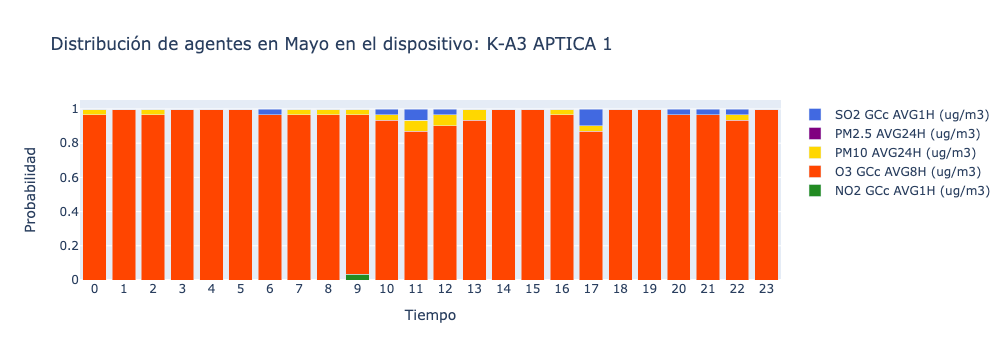

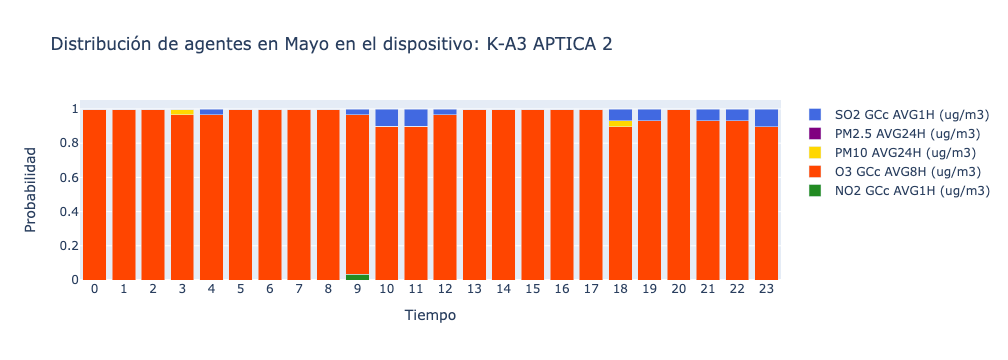

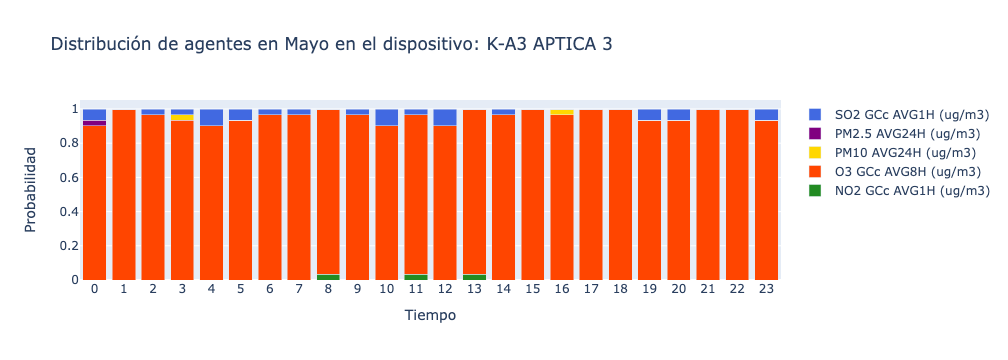

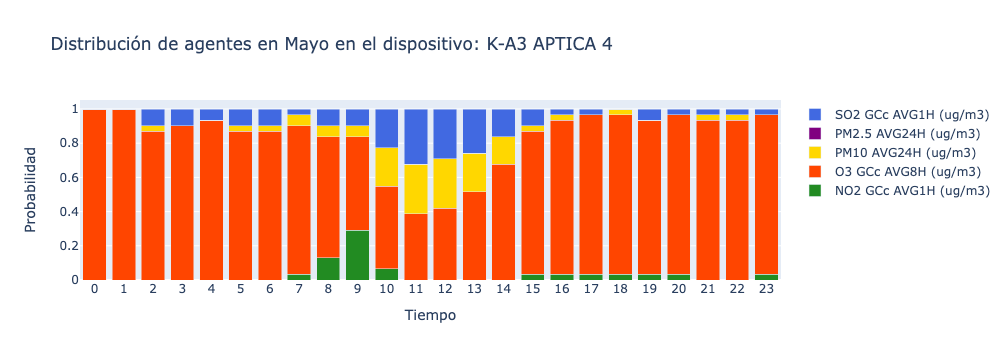

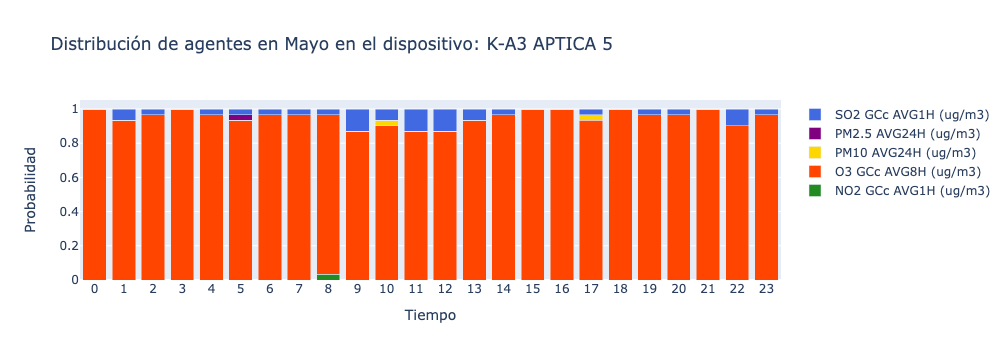

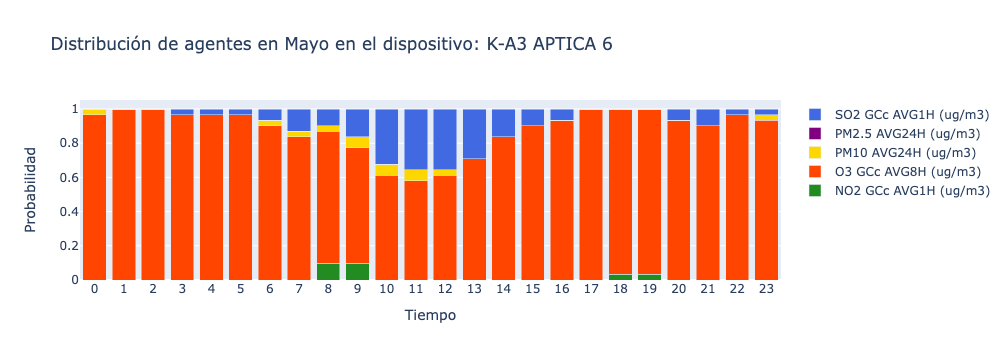

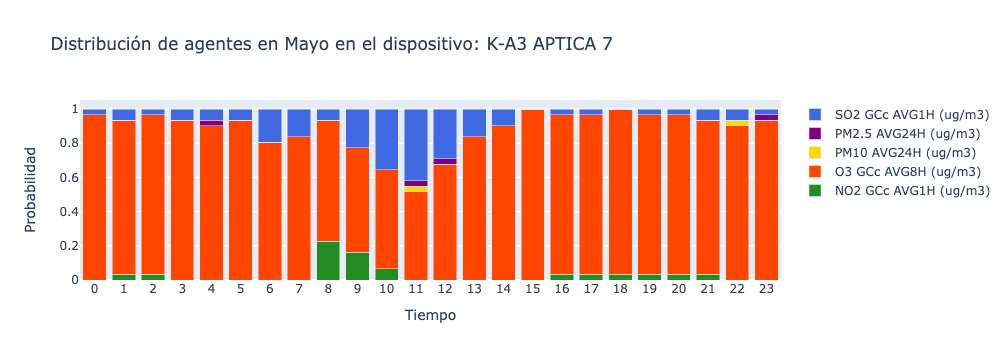

In [50]:
##intento 1 del 7 de noviembre
# Read the Excel file and combine all sheets into a single DataFrame
file_path = "PREVresultados_INCA_MAYO23.xlsx"
dataframes = []
for day in range(1, 32):
    sheet_name = f"2023-05-{day:02}"
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
# Convert 'Datetime' to a datetime object and extract the hour
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d/%m/%Y %H:%M:%S')
data['Hour'] = data['Datetime'].dt.hour

# Define the order of agents for column ordering in the stacked bar chart
agent_order = [
    "O3 GCc AVG8H (ug/m3)",
    "SO2 GCc AVG1H (ug/m3)",
    "PM2.5 AVG24H (ug/m3)",
    "PM10 AVG24H (ug/m3)",
    "NO2 GCc AVG1H (ug/m3)"
]

# Define a dictionary to map the index level to a numerical value
index_level_mapping = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Create a list of all hours from 0 to 23
all_hours = list(range(24))

# Pivot the data to get the count of each agent for each device and hour
pivot_data = data.pivot_table(index=['Dispositivo', 'Hour'], columns='Agente en banda superior', aggfunc='size', fill_value=0)
# Calculate the probabilities for each agent for each hour
pivot_data_percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Create a stacked bar chart for each device using Plotly Graph Objects
devices = pivot_data_percentages.index.get_level_values(0).unique()
colors = ['forestgreen', 'orangered', 'gold', 'purple', 'royalblue']

# Calculate the distribution of "Banda" for each agent, hour, and device
banda_distribution = data.pivot_table(index=['Dispositivo', 'Hour', 'Agente en banda superior'], columns='Banda', aggfunc='size', fill_value=0)
banda_distribution_percentages = banda_distribution.div(banda_distribution.sum(axis=1), axis=0)

# Define a dictionary to map "Banda" values to colors
banda_colors = {
    "BUENA": "green",
    "RAZONABLEMENTE BUENA": "yellow",
    "REGULAR": "orange",
    "DESFAVORABLE": "red",
    "MUY DESFAVORABLE": "purple",
    "EXTREMADAMENTE DESFAVORABLE": "darkred"
}

# Add "Banda" distribution to the hover information
for device in devices:
    device_data = pivot_data_percentages.xs(device, level='Dispositivo')
    hours = device_data.index
    agent_probabilities = device_data.values.T
    bottom = np.zeros(len(hours))
    fig = go.Figure()
    for i, agent in enumerate(pivot_data_percentages.columns):
        customdata = []
        hover_text = []
        agent_name = agent.split()[0]  # Cogemos solo la primera palabra del nombre para la ventana emergente
        for hour in hours:
            distribution_info = []
            for banda in banda_distribution.columns:
                if (device, hour, agent) in banda_distribution_percentages.index and banda in banda_distribution_percentages.columns:
                    distribution_info.append(f"{banda}: {banda_distribution_percentages.loc[(device, hour, agent)][banda]:.2%}")
                else:
                    distribution_info.append(f"{banda}: 0.00%")
            customdata.append(distribution_info)
            hover_text.append(f"Agente:{agent_name}<br>Hora: {hour}h<br>Porcentaje: {agent_probabilities[i][hour]:.2%}<br>Distribución de INCA<br>{'<br>'.join(distribution_info)}")

            #hover_text.append(f"{agent}<br>{'<br>'.join(distribution_info)}")  # Use '<br>' to create new lines

        fig.add_trace(go.Bar(
            x=hours,
            y=agent_probabilities[i],
            name=agent,
            customdata=customdata,
            hoverinfo="text",
            hovertext=hover_text,
            marker_color=colors[i],
        ))
        bottom += agent_probabilities[i]

    fig.update_layout(
        barmode="stack",
        title=f"Distribución de agentes en Mayo en el dispositivo: {device}",
        xaxis_title="Tiempo",
        yaxis_title="Probabilidad",
        xaxis={'tickvals': all_hours, 'ticktext': all_hours},
        showlegend=True,
    )

    fig.show()
    pio.write_html(fig, file=f'interactive_plot_{device}.html', auto_open=False)


In [ ]:
# Read the Excel file and combine all sheets into a single DataFrame
file_path = "resultados_INCA_MAYO23.xlsx"
dataframes = []
for day in range(1, 32):
    sheet_name = f"2023-05-{day:02}"
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
# Convert 'Datetime' to a datetime object and extract the hour
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d/%m/%Y %H:%M:%S')
data['Hour'] = data['Datetime'].dt.hour

# Define the order of agents for column ordering in the stacked bar chart
agent_order = [
    "O3 GCc AVG8H (ug/m3)",
    "SO2 GCc AVG1H (ug/m3)",
    "PM2.5 AVG24H (ug/m3)",
    "PM10 AVG24H (ug/m3)",
    "NO2 GCc AVG1H (ug/m3)"
]

# Define a dictionary to map the index level to a numerical value
index_level_mapping = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Create a list of all hours from 0 to 23
all_hours = list(range(24))

# Pivot the data to get the count of each agent for each device and hour
pivot_data = data.pivot_table(index=['Dispositivo', 'Hour'], columns='Agente en banda superior', aggfunc='size', fill_value=0)
# Calculate the probabilities for each agent for each hour
pivot_data_percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Create a stacked bar chart for each device using Plotly Graph Objects
devices = pivot_data_percentages.index.get_level_values(0).unique()
colors = ['forestgreen', 'orangered', 'gold', 'purple', 'royalblue']

for device in devices:
    device_data = pivot_data_percentages.xs(device, level='Dispositivo')
    hours = device_data.index
    agent_probabilities = device_data.values.T
    bottom = np.zeros(len(hours))
    fig = go.Figure()  # Create a new figure for each device
    for i, agent in enumerate(pivot_data_percentages.columns):
        fig.add_trace(go.Bar(
            x=hours,
            y=agent_probabilities[i],
            name=agent,
            customdata=device_data[agent].apply(lambda x: f"{x:.2%}"),
            marker_color=colors[i],
            hoverinfo=['x', 'name', 'text'],
            hoverlabel={'font': {'size': 12}}  # Adjust the font size as needed

        ))
        bottom += agent_probabilities[i]

    fig.update_layout(
        barmode="stack",
        title=f"Distribución de agentes en Mayo en dispositivo: {device}",
        xaxis_title="Tiempo",
        yaxis_title="Probabilidad",
        xaxis={'tickvals': all_hours, 'ticktext': all_hours},
        showlegend=True,
    )

    fig.show()

In [ ]:
# Read the Excel file and combine all sheets into a single DataFrame
file_path = "PREVresultados_INCA_JUNIO23.xlsx"
dataframes = []
for day in range(1, 32):
    sheet_name = f"2023-06-{day:02}"
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
# Convert 'Datetime' to a datetime object and extract the hour
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d/%m/%Y %H:%M:%S')
data['Hour'] = data['Datetime'].dt.hour

# Define the order of agents for column ordering in the stacked bar chart
agent_order = [
    "O3 GCc AVG8H (ug/m3)",
    "SO2 GCc AVG1H (ug/m3)",
    "PM2.5 AVG24H (ug/m3)",
    "PM10 AVG24H (ug/m3)",
    "NO2 GCc AVG1H (ug/m3)"
]

# Define a dictionary to map the index level to a numerical value
index_level_mapping = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Create a list of all hours from 0 to 23
all_hours = list(range(24))

# Pivot the data to get the count of each agent for each device and hour
pivot_data = data.pivot_table(index=['Dispositivo', 'Hour'], columns='Agente en banda superior', aggfunc='size', fill_value=0)
# Calculate the probabilities for each agent for each hour
pivot_data_percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Create a stacked bar chart for each device using Plotly Graph Objects
devices = pivot_data_percentages.index.get_level_values(0).unique()
colors = ['forestgreen', 'orangered', 'gold', 'purple', 'royalblue']

for device in devices:
    device_data = pivot_data_percentages.xs(device, level='Dispositivo')
    hours = device_data.index
    agent_probabilities = device_data.values.T
    bottom = np.zeros(len(hours))
    fig = go.Figure()  # Create a new figure for each device
    for i, agent in enumerate(pivot_data_percentages.columns):
        fig.add_trace(go.Bar(
            x=hours,
            y=agent_probabilities[i],
            name=agent,
            customdata=device_data[agent].apply(lambda x: f"{x:.2%}"),
            marker_color=colors[i],
            hoverinfo=['x', 'name', 'text'],
            hoverlabel={'font': {'size': 12}}  # Adjust the font size as needed

        ))
        bottom += agent_probabilities[i]

    fig.update_layout(
        barmode="stack",
        title=f"Distribución de agentes en Junio en dispositivo: {device}",
        xaxis_title="Tiempo",
        yaxis_title="Probabilidad",
        xaxis={'tickvals': all_hours, 'ticktext': all_hours},
        showlegend=True,
    )

    fig.show()

In [ ]:
# Read the Excel file and combine all sheets into a single DataFrame
file_path = "resultados_INCA_JUNIO23.xlsx"
dataframes = []
for day in range(1, 32):
    sheet_name = f"2023-06-{day:02}"
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
# Convert 'Datetime' to a datetime object and extract the hour
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d/%m/%Y %H:%M:%S')
data['Hour'] = data['Datetime'].dt.hour

# Define the order of agents for column ordering in the stacked bar chart
agent_order = [
    "O3 GCc AVG8H (ug/m3)",
    "SO2 GCc AVG1H (ug/m3)",
    "PM2.5 AVG24H (ug/m3)",
    "PM10 AVG24H (ug/m3)",
    "NO2 GCc AVG1H (ug/m3)"
]

# Define a dictionary to map the index level to a numerical value
index_level_mapping = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Create a list of all hours from 0 to 23
all_hours = list(range(24))

# Pivot the data to get the count of each agent for each device and hour
pivot_data = data.pivot_table(index=['Dispositivo', 'Hour'], columns='Agente en banda superior', aggfunc='size', fill_value=0)
# Calculate the probabilities for each agent for each hour
pivot_data_percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Create a stacked bar chart for each device using Plotly Graph Objects
devices = pivot_data_percentages.index.get_level_values(0).unique()
colors = ['forestgreen', 'orangered', 'gold', 'purple', 'royalblue']

for device in devices:
    device_data = pivot_data_percentages.xs(device, level='Dispositivo')
    hours = device_data.index
    agent_probabilities = device_data.values.T
    bottom = np.zeros(len(hours))
    fig = go.Figure()  # Create a new figure for each device
    for i, agent in enumerate(pivot_data_percentages.columns):
        fig.add_trace(go.Bar(
            x=hours,
            y=agent_probabilities[i],
            name=agent,
            customdata=device_data[agent].apply(lambda x: f"{x:.2%}"),
            marker_color=colors[i],
            hoverinfo=['x', 'name', 'text'],
            hoverlabel={'font': {'size': 12}}  # Adjust the font size as needed

        ))
        bottom += agent_probabilities[i]

    fig.update_layout(
        barmode="stack",
        title=f"Distribución de agentes en Junio en dispositivo: {device}",
        xaxis_title="Tiempo",
        yaxis_title="Probabilidad",
        xaxis={'tickvals': all_hours, 'ticktext': all_hours},
        showlegend=True,
    )

    fig.show()

In [ ]:
# Read the Excel file and combine all sheets into a single DataFrame
file_path = "resultados_INCA_JULIO23.xlsx"
dataframes = []
for day in range(1, 32):
    sheet_name = f"2023-07-{day:02}"
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
# Convert 'Datetime' to a datetime object and extract the hour
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d/%m/%Y %H:%M:%S')
data['Hour'] = data['Datetime'].dt.hour

# Define the order of agents for column ordering in the stacked bar chart
agent_order = [
    "O3 GCc AVG8H (ug/m3)",
    "SO2 GCc AVG1H (ug/m3)",
    "PM2.5 AVG24H (ug/m3)",
    "PM10 AVG24H (ug/m3)",
    "NO2 GCc AVG1H (ug/m3)"
]

# Define a dictionary to map the index level to a numerical value
index_level_mapping = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Create a list of all hours from 0 to 23
all_hours = list(range(24))

# Pivot the data to get the count of each agent for each device and hour
pivot_data = data.pivot_table(index=['Dispositivo', 'Hour'], columns='Agente en banda superior', aggfunc='size', fill_value=0)
# Calculate the probabilities for each agent for each hour
pivot_data_percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Create a stacked bar chart for each device using Plotly Graph Objects
devices = pivot_data_percentages.index.get_level_values(0).unique()
colors = ['forestgreen', 'orangered', 'gold', 'purple', 'royalblue']

for device in devices:
    device_data = pivot_data_percentages.xs(device, level='Dispositivo')
    hours = device_data.index
    agent_probabilities = device_data.values.T
    bottom = np.zeros(len(hours))
    fig = go.Figure()  # Create a new figure for each device
    for i, agent in enumerate(pivot_data_percentages.columns):
        fig.add_trace(go.Bar(
            x=hours,
            y=agent_probabilities[i],
            name=agent,
            customdata=device_data[agent].apply(lambda x: f"{x:.2%}"),
            marker_color=colors[i],
            hoverinfo=['x', 'name', 'text'],
            hoverlabel={'font': {'size': 12}}  # Adjust the font size as needed

        ))
        bottom += agent_probabilities[i]

    fig.update_layout(
        barmode="stack",
        title=f"Distribución de agentes en Julio en dispositivo: {device}",
        xaxis_title="Tiempo",
        yaxis_title="Probabilidad",
        xaxis={'tickvals': all_hours, 'ticktext': all_hours},
        showlegend=True,
    )

    fig.show()

In [ ]:
# Read the Excel file and combine all sheets into a single DataFrame
file_path = "resultados_INCA_AGOSTO23.xlsx"
dataframes = []
for day in range(1, 32):
    sheet_name = f"2023-08-{day:02}"
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
# Convert 'Datetime' to a datetime object and extract the hour
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d/%m/%Y %H:%M:%S')
data['Hour'] = data['Datetime'].dt.hour

# Define the order of agents for column ordering in the stacked bar chart
agent_order = [
    "O3 GCc AVG8H (ug/m3)",
    "SO2 GCc AVG1H (ug/m3)",
    "PM2.5 AVG24H (ug/m3)",
    "PM10 AVG24H (ug/m3)",
    "NO2 GCc AVG1H (ug/m3)"
]

# Define a dictionary to map the index level to a numerical value
index_level_mapping = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Create a list of all hours from 0 to 23
all_hours = list(range(24))

# Pivot the data to get the count of each agent for each device and hour
pivot_data = data.pivot_table(index=['Dispositivo', 'Hour'], columns='Agente en banda superior', aggfunc='size', fill_value=0)
# Calculate the probabilities for each agent for each hour
pivot_data_percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Create a stacked bar chart for each device using Plotly Graph Objects
devices = pivot_data_percentages.index.get_level_values(0).unique()
colors = ['forestgreen', 'orangered', 'gold', 'purple', 'royalblue']

for device in devices:
    device_data = pivot_data_percentages.xs(device, level='Dispositivo')
    hours = device_data.index
    agent_probabilities = device_data.values.T
    bottom = np.zeros(len(hours))
    fig = go.Figure()  # Create a new figure for each device
    for i, agent in enumerate(pivot_data_percentages.columns):
        fig.add_trace(go.Bar(
            x=hours,
            y=agent_probabilities[i],
            name=agent,
            customdata=device_data[agent].apply(lambda x: f"{x:.2%}"),
            marker_color=colors[i],
            hoverinfo=['x', 'name', 'text'],
            hoverlabel={'font': {'size': 12}}  # Adjust the font size as needed

        ))
        bottom += agent_probabilities[i]

    fig.update_layout(
        barmode="stack",
        title=f"Distribución de agentes en Agosto en dispositivo: {device}",
        xaxis_title="Tiempo",
        yaxis_title="Probabilidad",
        xaxis={'tickvals': all_hours, 'ticktext': all_hours},
        showlegend=True,
    )

    fig.show()

In [ ]:
# Read the Excel file and combine all sheets into a single DataFrame
file_path = "resultados_INCA_SEPTIEMBRE23.xlsx"
dataframes = []
for day in range(1, 32):
    sheet_name = f"2023-09-{day:02}"
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
# Convert 'Datetime' to a datetime object and extract the hour
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d/%m/%Y %H:%M:%S')
data['Hour'] = data['Datetime'].dt.hour

# Define the order of agents for column ordering in the stacked bar chart
agent_order = [
    "O3 GCc AVG8H (ug/m3)",
    "SO2 GCc AVG1H (ug/m3)",
    "PM2.5 AVG24H (ug/m3)",
    "PM10 AVG24H (ug/m3)",
    "NO2 GCc AVG1H (ug/m3)"
]

# Define a dictionary to map the index level to a numerical value
index_level_mapping = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Create a list of all hours from 0 to 23
all_hours = list(range(24))

# Pivot the data to get the count of each agent for each device and hour
pivot_data = data.pivot_table(index=['Dispositivo', 'Hour'], columns='Agente en banda superior', aggfunc='size', fill_value=0)
# Calculate the probabilities for each agent for each hour
pivot_data_percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Create a stacked bar chart for each device using Plotly Graph Objects
devices = pivot_data_percentages.index.get_level_values(0).unique()
colors = ['forestgreen', 'orangered', 'gold', 'purple', 'royalblue']

for device in devices:
    device_data = pivot_data_percentages.xs(device, level='Dispositivo')
    hours = device_data.index
    agent_probabilities = device_data.values.T
    bottom = np.zeros(len(hours))
    fig = go.Figure()  # Create a new figure for each device
    for i, agent in enumerate(pivot_data_percentages.columns):
        fig.add_trace(go.Bar(
            x=hours,
            y=agent_probabilities[i],
            name=agent,
            customdata=device_data[agent].apply(lambda x: f"{x:.2%}"),
            marker_color=colors[i],
            hoverinfo=['x', 'name', 'text'],
            hoverlabel={'font': {'size': 12}}  # Adjust the font size as needed

        ))
        bottom += agent_probabilities[i]

    fig.update_layout(
        barmode="stack",
        title=f"Distribución de agentes en Septiembre en dispositivo: {device}",
        xaxis_title="Tiempo",
        yaxis_title="Probabilidad",
        xaxis={'tickvals': all_hours, 'ticktext': all_hours},
        showlegend=True,
    )

    fig.show()

In [ ]:
##LA SIGUIENTE CELDA ES LA GENERACIÓN DE GRÁFICAS PARA OCTUBRE
##ARREGLAR PRIMERO EL EXCEL ANTES DE DESCOMENTAR LO QUE VIENE

Este siguiente código pretende como decía antes guardar todos los resultados en un mismo html pero que estén separados para que se vean bien las gráficas.
!!!!!!!!!!!!!!AQUIIIII!!!!!!
AHORA INTENTAR COMBINAR LAS DOS CELDAS SIGUIENTES, QUEREMOS LAS GRÁFICAS DE INTERACTIVE_PLOTS CON UNA LEYENDA COMÚN ARRIBA, PERO CON LAS GRÁFICAS SEPARDAS COMO ESTÁN EN INTERACTIVE_PLOTS2!!!!!!!!

In [7]:
# Read the Excel file and combine all sheets into a single DataFrame
file_path = "resultados_INCA_MAYO23.xlsx"
dataframes = []
for day in range(1, 32):
    sheet_name = f"2023-05-{day:02}"
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
# Convert 'Datetime' to a datetime object and extract the hour
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d/%m/%Y %H:%M:%S')
data['Hour'] = data['Datetime'].dt.hour

# Define the order of agents for column ordering in the stacked bar chart
agent_order = [
    "O3 GCc AVG8H (ug/m3)",
    "SO2 GCc AVG1H (ug/m3)",
    "PM2.5 AVG24H (ug/m3)",
    "PM10 AVG24H (ug/m3)",
    "NO2 GCc AVG1H (ug/m3)"
]

# Define a dictionary to map the index level to a numerical value
index_level_mapping = {
    "BUENA": 1,
    "RAZONABLEMENTE BUENA": 2,
    "REGULAR": 3,
    "DESFAVORABLE": 4,
    "MUY DESFAVORABLE": 5,
    "EXTREMADAMENTE DESFAVORABLE": 6
}

# Create a list of all hours from 0 to 23
all_hours = list(range(24))

# Pivot the data to get the count of each agent for each device and hour
pivot_data = data.pivot_table(index=['Dispositivo', 'Hour'], columns='Agente en banda superior', aggfunc='size', fill_value=0)
# Calculate the probabilities for each agent for each hour
pivot_data_percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Create a single figure to store all traces
fig = go.Figure()

# Create a stacked bar chart for each device using Plotly Graph Objects
devices = pivot_data_percentages.index.get_level_values(0).unique()
colors = ['forestgreen', 'orangered', 'gold', 'purple', 'royalblue']

for device in devices:
    device_data = pivot_data_percentages.xs(device, level='Dispositivo')
    hours = device_data.index
    agent_probabilities = device_data.values.T
    bottom = np.zeros(len(hours))

    for i, agent in enumerate(pivot_data_percentages.columns):
        fig.add_trace(go.Bar(
            x=hours,
            y=agent_probabilities[i],
            name=agent,
            customdata=device_data[agent].apply(lambda x: f"{x:.2%}"),
            marker_color=colors[i],
            hoverinfo=['x', 'name', 'text'],
            hoverlabel={'font': {'size': 12}}  # Adjust the font size as needed
        ))
        bottom += agent_probabilities[i]

fig.update_layout(
    barmode="stack",
    title="Distribution of Agents for Devices",
    xaxis_title="Time",
    yaxis_title="Probability",
    xaxis={'tickvals': all_hours, 'ticktext': all_hours},
    showlegend=True,
)

# Save the figure to an HTML file
pio.write_html(fig, file='interactive_plots.html', auto_open=True)
